# Intro to Formula 1 Data Analysis with Python

Jupyter notebooks have a lot of useful shortcuts:
- 'M' will convert a cell to Markdown
- 'A' will insert a cell Above the current one
- 'B' will insert a cell Below the current one 
- 'DD' will delete a cell
- 'C' will copy a cell
- 'X' will cut a cell
- 'V' will paste a cell

- 'Shift + Enter' will run a cell and move to the next one
- 'Control + Enter' will run a cell and stay in the current one

## 0. Setting everything up

In [1]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.collections import LineCollection


In [2]:
# Set the cache directory (make sure to create a folder called 'cache' in the SAME folder as this script)
ff1.Cache.enable_cache('cache')

# Enable the fastf1 matplotlib settings
ff1.plotting.setup_mpl()

In [3]:
# Load the session and its laps
session = ff1.get_session(2023, 'Bahrain', 'Q')
session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/Users/kepstein/.pyenv/versions/3.9.4/envs/fastf1/lib/python3.9/site-packages/fastf1/core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
/Users/kepstein/.pyenv/versions/3.9.4/envs/fastf1/lib/python3.9/site-packages/fastf1/core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
/Users/kepstein/.pyenv/versions/3.9.4/envs/fastf1/lib/python3.9/site-packages/fastf1/core.py:1415: FutureWarn

## 1. Exploring the data

In [4]:
# Explore the lap data
session.laps

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 00:27:20.459000,1,NaT,1,0 days 00:18:59.843000,0 days 00:21:06.934000,NaT,NaT,NaT,NaT,...,SOFT,1.0,True,1,0 days 00:18:59.843000,Red Bull Racing,VER,5,False,2023-03-04 15:04:00.840
1,0 days 00:29:32.394000,1,NaT,2,0 days 00:27:20.459000,NaT,NaT,0 days 00:00:53.666000,0 days 00:00:38.509000,NaT,...,SOFT,2.0,False,2,0 days 00:27:20.459000,Red Bull Racing,VER,1,False,2023-03-04 15:12:21.456
2,0 days 00:31:03.689000,1,0 days 00:01:31.295000,3,NaT,NaT,0 days 00:00:29.152000,0 days 00:00:39.195000,0 days 00:00:22.948000,0 days 00:30:01.546000,...,SOFT,3.0,False,2,0 days 00:29:32.394000,Red Bull Racing,VER,1,True,2023-03-04 15:14:33.391
3,0 days 00:32:53.501000,1,0 days 00:01:49.812000,4,NaT,0 days 00:32:51.749000,0 days 00:00:35.615000,0 days 00:00:44.953000,0 days 00:00:29.244000,0 days 00:31:39.304000,...,SOFT,4.0,False,2,0 days 00:31:03.689000,Red Bull Racing,VER,1,False,2023-03-04 15:16:04.686
4,0 days 00:40:05.688000,1,NaT,5,0 days 00:37:48.525000,NaT,NaT,0 days 00:00:53.390000,0 days 00:00:45.107000,NaT,...,SOFT,1.0,True,3,0 days 00:32:53.501000,Red Bull Racing,VER,1,False,2023-03-04 15:17:54.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0 days 00:32:13.869000,10,0 days 00:01:32.181000,2,NaT,NaT,0 days 00:00:29.330000,0 days 00:00:39.764000,0 days 00:00:23.087000,0 days 00:31:11.018000,...,SOFT,2.0,True,1,0 days 00:30:41.688000,Alpine,GAS,1,True,2023-03-04 15:15:42.685
250,0 days 00:34:06.375000,10,0 days 00:01:52.506000,3,NaT,0 days 00:34:03.170000,0 days 00:00:33.458000,0 days 00:00:47.084000,0 days 00:00:31.964000,0 days 00:32:47.327000,...,SOFT,3.0,True,1,0 days 00:32:13.869000,Alpine,GAS,1,False,2023-03-04 15:17:14.866
251,0 days 00:39:15.464000,10,NaT,4,0 days 00:36:54.776000,NaT,NaT,0 days 00:00:54.291000,0 days 00:00:45.228000,NaT,...,SOFT,1.0,True,2,0 days 00:34:06.375000,Alpine,GAS,1,False,2023-03-04 15:19:07.372
252,0 days 00:40:47.282000,10,0 days 00:01:31.818000,5,NaT,NaT,0 days 00:00:29.247000,0 days 00:00:39.412000,0 days 00:00:23.159000,0 days 00:39:44.711000,...,SOFT,2.0,True,2,0 days 00:39:15.464000,Alpine,GAS,1,True,2023-03-04 15:24:16.461


In [5]:
# Finding laps of a specific driver 
laps_lat = session.laps.pick_driver('VER')
laps_lat

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 00:27:20.459000,1,NaT,1,0 days 00:18:59.843000,0 days 00:21:06.934000,NaT,NaT,NaT,NaT,...,SOFT,1.0,True,1,0 days 00:18:59.843000,Red Bull Racing,VER,5,False,2023-03-04 15:04:00.840
1,0 days 00:29:32.394000,1,NaT,2,0 days 00:27:20.459000,NaT,NaT,0 days 00:00:53.666000,0 days 00:00:38.509000,NaT,...,SOFT,2.0,False,2,0 days 00:27:20.459000,Red Bull Racing,VER,1,False,2023-03-04 15:12:21.456
2,0 days 00:31:03.689000,1,0 days 00:01:31.295000,3,NaT,NaT,0 days 00:00:29.152000,0 days 00:00:39.195000,0 days 00:00:22.948000,0 days 00:30:01.546000,...,SOFT,3.0,False,2,0 days 00:29:32.394000,Red Bull Racing,VER,1,True,2023-03-04 15:14:33.391
3,0 days 00:32:53.501000,1,0 days 00:01:49.812000,4,NaT,0 days 00:32:51.749000,0 days 00:00:35.615000,0 days 00:00:44.953000,0 days 00:00:29.244000,0 days 00:31:39.304000,...,SOFT,4.0,False,2,0 days 00:31:03.689000,Red Bull Racing,VER,1,False,2023-03-04 15:16:04.686
4,0 days 00:40:05.688000,1,NaT,5,0 days 00:37:48.525000,NaT,NaT,0 days 00:00:53.390000,0 days 00:00:45.107000,NaT,...,SOFT,1.0,True,3,0 days 00:32:53.501000,Red Bull Racing,VER,1,False,2023-03-04 15:17:54.498
5,0 days 00:42:18.204000,1,0 days 00:02:12.516000,6,NaT,0 days 00:42:16.255000,0 days 00:00:48.978000,0 days 00:00:48.136000,0 days 00:00:35.402000,0 days 00:40:54.666000,...,SOFT,2.0,True,3,0 days 00:40:05.688000,Red Bull Racing,VER,1,False,2023-03-04 15:25:06.685
6,0 days 00:53:44.711000,1,NaT,7,0 days 00:51:39.792000,NaT,NaT,0 days 00:00:56.693000,0 days 00:00:30.799000,NaT,...,SOFT,1.0,True,4,0 days 00:42:18.204000,Red Bull Racing,VER,1,False,2023-03-04 15:27:19.201
7,0 days 00:55:15.214000,1,0 days 00:01:30.503000,8,NaT,NaT,0 days 00:00:28.925000,0 days 00:00:38.915000,0 days 00:00:22.663000,0 days 00:54:13.636000,...,SOFT,2.0,True,4,0 days 00:53:44.711000,Red Bull Racing,VER,1,True,2023-03-04 15:38:45.708
8,0 days 00:57:20.970000,1,0 days 00:02:05.756000,9,NaT,0 days 00:57:19.192000,0 days 00:00:38.904000,0 days 00:00:53.517000,0 days 00:00:33.335000,0 days 00:55:54.118000,...,SOFT,3.0,True,4,0 days 00:55:15.214000,Red Bull Racing,VER,1,False,2023-03-04 15:40:16.211
9,0 days 01:14:21.316000,1,NaT,10,0 days 01:12:26.488000,NaT,NaT,0 days 00:00:52.962000,0 days 00:00:27.476000,NaT,...,SOFT,1.0,True,5,0 days 00:57:20.970000,Red Bull Racing,VER,1,False,2023-03-04 15:42:21.967


In [6]:
# Finding fastest lap of a driver 
laps_lat.pick_fastest()

Time                      0 days 01:23:54.472000
DriverNumber                                   1
LapTime                   0 days 00:01:29.708000
LapNumber                                     14
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:28.736000
Sector2Time               0 days 00:00:38.514000
Sector3Time               0 days 00:00:22.458000
Sector1SessionTime        0 days 01:22:53.500000
Sector2SessionTime        0 days 01:23:32.014000
Sector3SessionTime        0 days 01:23:54.472000
SpeedI1                                    241.0
SpeedI2                                    271.0
SpeedFL                                    288.0
SpeedST                                    321.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife                                     2.0
FreshTyre                                  False
Stint               

In [7]:
laps_lat.pick_fastest().get_telemetry()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2023-03-04 16:07:25.761,0 days 01:22:24.764000,,1396.081389,0 days 00:00:00,10647,293,7,100,False,12,interpolation,0.022341,0.000004,OnTrack,-380,1264,-158
3,2023-03-04 16:07:25.858,0 days 01:22:24.861000,,1396.081389,0 days 00:00:00.097000,10623,294,7,100,False,12,pos,7.985532,0.001483,OnTrack,-376,1366,-159
4,2023-03-04 16:07:26.056,0 days 01:22:25.059000,,1396.081389,0 days 00:00:00.295000,10575,296,8,100,False,12,car,24.283333,0.004509,OnTrack,-363,1642,-159
5,2023-03-04 16:07:26.058,0 days 01:22:25.061000,,1396.081389,0 days 00:00:00.297000,10635,297,8,100,False,12,pos,24.448242,0.004540,OnTrack,-363,1645,-159
6,2023-03-04 16:07:26.377,0 days 01:22:25.380000,31,1396.081389,0 days 00:00:00.616000,10695,298,8,100,False,12,car,50.855000,0.009444,OnTrack,-354,1842,-158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,2023-03-04 16:08:54.977,0 days 01:23:53.980000,31,1006.834444,0 days 00:01:29.216000,11373,288,7,100,False,12,car,5326.639167,0.989139,OnTrack,-393,997,-159
652,2023-03-04 16:08:55.177,0 days 01:23:54.180000,31,998.390000,0 days 00:01:29.416000,11478,290,7,100,False,12,car,5342.750278,0.992131,OnTrack,-386,1145,-159
653,2023-03-04 16:08:55.318,0 days 01:23:54.321000,31,992.345000,0 days 00:01:29.557000,11521,291,7,100,False,12,pos,5354.197834,0.994257,OnTrack,-382,1251,-159
654,2023-03-04 16:08:55.456,0 days 01:23:54.459000,31,986.300000,0 days 00:01:29.695000,11564,293,7,100,False,12,car,5365.457778,0.996348,OnTrack,-376,1366,-158


In [8]:
# Lap is 73 seconds 
# We have 573 rows
# That's almost 8 data points per second!
573/73

7.8493150684931505

# 2. Let's build some plots

In [9]:
# Specify the drivers we want to compare
driver_1, driver_2 = 'ALO', 'VER'

In [10]:
# Find the laps
laps_driver_1 = session.laps.pick_driver(driver_1)
laps_driver_2 = session.laps.pick_driver(driver_2)

fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()

telemetry_driver_1 = fastest_driver_1.get_telemetry()
telemetry_driver_2 = fastest_driver_2.get_telemetry()

https://theoehrly.github.io/Fast-F1/utils.html

In [11]:
# Get the gap (delta time) between driver 1 and driver 2
delta_time, ref_tel, compare_tel = ff1.utils.delta_time(fastest_driver_1, fastest_driver_2)

In [12]:
# Identify team colors
team_driver_1 = laps_driver_1['Team'].iloc[0]
team_driver_2 = laps_driver_2['Team'].iloc[0]

# Fastf1 has a built-in function for the team colors!
color_1 = ff1.plotting.team_color(team_driver_1)
color_2 = ff1.plotting.team_color(team_driver_2)

### 2.1 Telemetry comparison

In [13]:
# Set the size of the plot
# plt.rcParams['figure.figsize'] = [20, 15]
#
# # Our plot will consist of 7 "subplots":
# #     - Delta
# #     - Speed
# #     - Throttle
# #     - Braking
# #     - Gear
# #     - RPM
# #     - DRS
# fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': [1, 3, 2, 1, 1, 2, 1]})
#
# # Set the title of the plot
# ax[0].title.set_text(f"Telemetry comparison {driver_1} vs. {driver_2}")
#
# # Subplot 1: The delta
# ax[0].plot(ref_tel['Distance'], delta_time, color=color_1)
# ax[0].axhline(0)
# ax[0].set(ylabel=f"Gap to {driver_2} (s)")
#
# # Subplot 2: Distance
# ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1, color=color_1)
# ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver_2, color=color_2)
# ax[1].set(ylabel='Speed')
# ax[1].legend(loc="lower right")
#
# # Subplot 3: Throttle
# ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver_1, color=color_1)
# ax[2].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Throttle'], label=driver_2, color=color_2)
# ax[2].set(ylabel='Throttle')
#
# # Subplot 4: Brake
# ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver_1, color=color_1)
# ax[3].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Brake'], label=driver_2, color=color_2)
# ax[3].set(ylabel='Brake')
#
# # Subplot 5: Gear
# ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'], label=driver_1, color=color_1)
# ax[4].plot(telemetry_driver_2['Distance'], telemetry_driver_2['nGear'], label=driver_2, color=color_2)
# ax[4].set(ylabel='Gear')
#
# # Subplot 6: RPM
# ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM'], label=driver_1, color=color_1)
# ax[5].plot(telemetry_driver_2['Distance'], telemetry_driver_2['RPM'], label=driver_2, color=color_2)
# ax[5].set(ylabel='RPM')
#
# # Subplot 7: DRS
# ax[6].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'], label=driver_1, color=color_1)
# ax[6].plot(telemetry_driver_2['Distance'], telemetry_driver_2['DRS'], label=driver_2, color=color_2)
# ax[6].set(ylabel='DRS')
# ax[6].set(xlabel='Lap distance (meters)')
#
# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for a in ax.flat:
#     a.label_outer()

### 2.2 Minisector comparison

In [14]:
# Merge the telemetry from both drivers into one dataframe
telemetry_driver_1['Driver'] = driver_1
telemetry_driver_2['Driver'] = driver_2

telemetry = pd.concat([telemetry_driver_1, telemetry_driver_2])

In [15]:
# Calculate minisectors
num_minisectors = 25
total_distance = max(telemetry['Distance'])
minisector_length = total_distance / num_minisectors

minisectors = [0]

for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))

# Assign a minisector number to every row in the telemetry dataframe
telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)

In [16]:
# Calculate minisector speeds per driver
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()

# Per minisector, find the fastest driver
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})

# Merge the fastest_driver dataframe to the telemetry dataframe on minisector
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])
telemetry = telemetry.sort_values(by=['Distance'])

# Since our plot can only work with integers, we need to convert the driver abbreviations to integers (1 or 2)
telemetry.loc[telemetry['Fastest_driver'] == driver_1, 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == driver_2, 'Fastest_driver_int'] = 2

In [17]:
# Get the x and y coordinates 
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

# Convert the coordinates to points, and then concat them into segments
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

In [18]:
# The segments we just created can now be colored according to the fastest driver in a minisector
cmap = ListedColormap([color_1, color_2])
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

RuntimeError: Can not put single artist in more than one figure

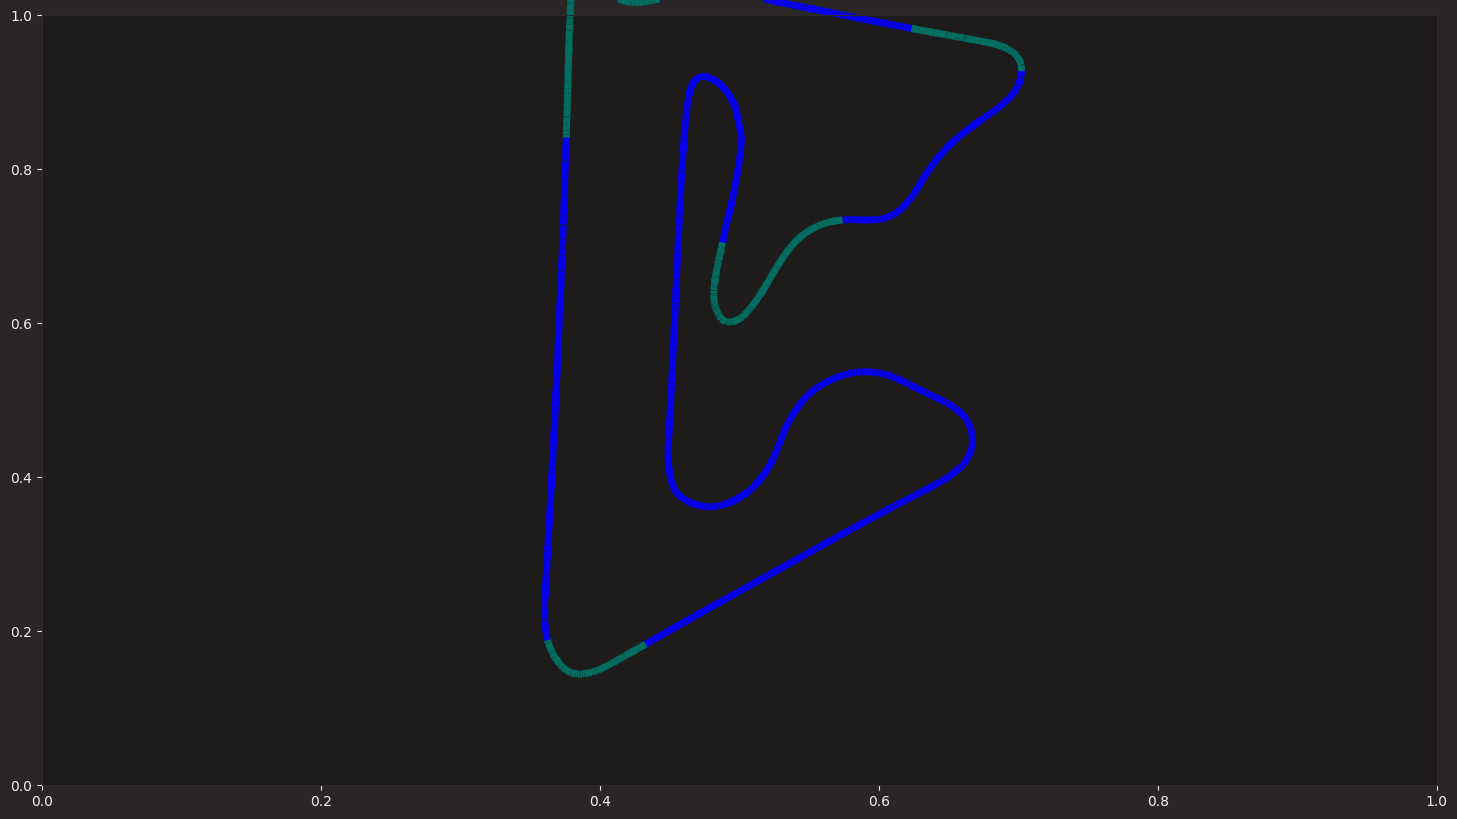

In [20]:
# Create the plot 
plt.rcParams['figure.figsize'] = [18, 10]

# Plot the line collection and style the plot
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.box(False)
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

# Add a colorbar for as legend
cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1,4))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels([driver_1, driver_2])